### Проект: Анализ вакансий на hh.ru

In [2453]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

### Исследование структуры данных

Прочитайте данные с помощью библиотеки Pandas. Перед чтением обратите внимание на разделитель внутри файла.

In [2454]:
hh = pd.read_csv(r'C:\skilfactory\dst-3.0_16_1_hh_database.csv', sep=';')

In [2455]:
hh

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано
...,...,...,...,...,...,...,...,...,...,...,...,...
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,Высшее образование 2015 Московский гуманитарн...,22.04.2019 12:32,Не указано
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль


#### Задание 2.1

Чему равна размерность таблицы? Введите её в виде кортежа (число строк, число столбцов).
44744 rows × 12 columns

#### Задание 2.2

В каком формате представлен порядок слов в признаке «Пол, возраст»?

<Пол , возраст , дата рождения>

Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [2456]:
hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

#### Задание 2.3

Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

Какой тип данных имеют все столбцы? Введите его в поле для ответа.
object


In [2457]:
hh.isnull().any()

Пол, возраст                       False
ЗП                                 False
Ищет работу на должность:          False
Город, переезд, командировки       False
Занятость                          False
График                             False
Опыт работы                         True
Последнее/нынешнее место работы     True
Последняя/нынешняя должность        True
Образование и ВУЗ                  False
Обновление резюме                  False
Авто                               False
dtype: bool

#### Задание 2.4

Обратите внимание на информацию о числе непустых значений.

Выберите все признаки, в которых есть пропуски в данных:

- Последняя/нынешняя должность
- Опыт работы
- Последнее/нынешнее место работы

In [2458]:
hh.describe(include='all')

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 2014 Тюменский Государствен...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


#### Задание 2.5

Выведите основную статистическую информацию о столбцах.

- Сколько уникальных значений содержится в столбце «Опыт работы»?
 44413
 
- Какая из искомых должностей самая распространённая? Введите название.
 Системный администратор


### Преобразование данных

Теперь, когда мы познакомились с информацией в таблице, настало время самого сложного этапа — предобработки данных.

Как вы могли уже заметить, наши данные очень «сырые»: признаки представлены в неудобном для анализа и очистки формате.

### столбец «Пол/возраст»

Например, столбец «Пол/возраст» содержит информацию и о поле, и о возрасте, и о дате рождения. Желаемая заработная плата представлена в виде текста с указанием валюты, в которой она исчисляется, и так далее…

Всё это не позволяет нам визуально оценить зависимости в данных: построить гистограмму распределения зарплаты и возраста, столбчатую диаграмму зарплаты по уровню образования и многое другое. Более того, мы не можем в таком виде заполнить пропущенные значения числовыми константами или найти выбросы. Иными словами, нам необходимо преобразовать данные, что позволит грамотно работать с ними.

Важно! Старайтесь выполнять обработку с помощью функций-преобразований (lambda-функций), которые принимают аргументом элемент столбца и возвращают его преобразованную версию. Данные функции применяйте к признакам с помощью метода apply().
Начнём с простого — с признака «Образование и ВУЗ». Его текущий формат — это: <Уровень образования год выпуска ВУЗ специальность...>. Например:

Высшее образование 2016 Московский авиационный институт (Национальный исследовательский университет).
Неоконченное высшее образование 2000 Балтийская государственная академия рыбопромыслового флота.

Нас будет интересовать только уровень образования. Причём, для простоты мы будем считать, что соискатель указывает свой максимальный уровень образования в первых трёх словах столбца «Образование и ВУЗ».

Создайте с помощью функции-преобразования новый признак «Образование», который должен иметь четыре категории: «высшее», «неоконченное высшее», «среднее специальное» и «среднее».

Выполните преобразование, ответьте на контрольные вопросы и удалите признак «Образование и ВУЗ».

In [2459]:
hh['Обновление резюме'] = pd.to_datetime(hh['Обновление резюме'], format='%d.%m.%Y %H:%M')

In [2460]:
hh.convert_dtypes().dtypes

Пол, возраст                               string
ЗП                                         string
Ищет работу на должность:                  string
Город, переезд, командировки               string
Занятость                                  string
График                                     string
Опыт работы                                string
Последнее/нынешнее место работы            string
Последняя/нынешняя должность               string
Образование и ВУЗ                          string
Обновление резюме                  datetime64[ns]
Авто                                       string
dtype: object

#### «Образование и ВУЗ»

Начнём с простого — с признака «Образование и ВУЗ». Его текущий формат — это: <Уровень образования год выпуска ВУЗ специальность...>. Например:

Высшее образование 2016 Московский авиационный институт (Национальный исследовательский университет).
Неоконченное высшее образование 2000 Балтийская государственная академия рыбопромыслового флота.

Нас будет интересовать только уровень образования. Причём, для простоты мы будем считать, что соискатель указывает свой максимальный уровень образования в первых трёх словах столбца «Образование и ВУЗ».

Создайте с помощью функции-преобразования новый признак «Образование», который должен иметь четыре категории: «высшее», «неоконченное высшее», «среднее специальное» и «среднее».

Выполните преобразование, ответьте на контрольные вопросы и удалите признак «Образование и ВУЗ».
 

In [2461]:
hh.insert(hh.columns.get_loc('Образование и ВУЗ') + 1, 'Образование', hh['Образование и ВУЗ'].apply(lambda x: x.split('образование')[0]))

In [2462]:
def extract_before_digit(text):
    match = re.match(r"^(.*?)(\d)", text)
    return match.group(1).strip() if match else text
hh['Образование'] = hh['Образование и ВУЗ'].apply(extract_before_digit)
def extract_date(text):
    match = re.search(r"\d{4}", text)
    return match.group(0) if match else None

# Применение функции для извлечения даты в отдельный столбец
hh['Год образования'] = hh['Образование и ВУЗ'].apply(extract_date)

In [2463]:
hh['Образование'].value_counts()

Высшее образование                    29088
Среднее специальное образование        5765
Неоконченное высшее образование        4557
Высшее образование (Бакалавр)          2633
Высшее образование (Магистр)           1812
Среднее образование                     559
Высшее образование (Кандидат наук)      323
Высшее образование (Доктор наук)          7
Name: Образование, dtype: int64

#### Задание 3.1

Сколько соискателей имеет средний уровень образования (школьное образование)?

559

### «Пол, возраст»

Теперь нас интересует столбец «Пол, возраст». Его текущий формат: <Пол , возраст, дата рождения>. Например:

Мужчина , 39 лет , родился 27 ноября 1979.
Женщина , 21 год , родилась 13 января 2000.

Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака «Пол» и «Возраст». При этом важно учесть:

Признак пола должен иметь два уникальных строковых значения: М — мужчина, Ж — женщина.
Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак «Пол, возраст» из таблицы.


Делим колонку Пол, возраст - на пол, возраст и дату рождения 

In [2464]:
hh.insert(hh.columns.get_loc('Пол, возраст') + 1, 'Пол', hh['Пол, возраст'].apply(lambda x: x.split()[0]))
hh.insert(hh.columns.get_loc('Пол') + 1, 'Возраст', hh['Пол, возраст'].apply(lambda x: x.split()[2]))
hh.insert(hh.columns.get_loc('Пол') + 1, 'Дата рождения', hh['Пол, возраст'].apply(lambda x: x.split()[6:]))
hh['Возраст'] = hh['Возраст'].astype(int)
hh.head(3)

,"Пол, возраст",Пол,Дата рождения,Возраст,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Образование,Обновление резюме,Авто,Год образования
0,"Мужчина , 39 лет , родился 27 ноября 1979",Мужчина,"[27, ноября, 1979]",39,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,Неоконченное высшее образование,2019-04-16 15:59:00,Имеется собственный автомобиль,2000
1,"Мужчина , 60 лет , родился 20 марта 1959",Мужчина,"[20, марта, 1959]",60,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,Высшее образование,2019-04-12 08:42:00,Не указано,1981
2,"Женщина , 36 лет , родилась 12 августа 1982",Женщина,"[12, августа, 1982]",36,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,Среднее специальное образование,2019-04-16 08:35:00,Не указано,2002


In [2465]:
# Функция перевода месяцев
def translate_month(date_list):
    month_translation = {
        'января': 'January', 'февраля': 'February', 'марта': 'March',
        'апреля': 'April', 'мая': 'May', 'июня': 'June',
        'июля': 'July', 'августа': 'August', 'сентября': 'September',
        'октября': 'October', 'ноября': 'November', 'декабря': 'December'
    }
    
    date_string = ' '.join(date_list)
    for ru_month, en_month in month_translation.items():
        if ru_month in date_string:
            date_string = date_string.replace(ru_month, en_month)
            break
    
    return pd.to_datetime(date_string, format='%d %B %Y')

# Преобразование столбца с датами
hh['Дата рождения'] = hh['Дата рождения'].apply(translate_month)

Переводим месяцы в даты и возраст в int

In [2466]:
hh['Возраст'].apply(lambda x: pd.to_numeric(x, errors='coerce'))

0        39
1        60
2        36
3        38
4        26
         ..
44739    30
44740    27
44741    48
44742    24
44743    38
Name: Возраст, Length: 44744, dtype: int64

In [2467]:
proportion_women = hh[hh['Пол'] == 'Женщина'].shape[0] / len(hh['Пол'])*100
print(proportion_women)


19.070713391739673


In [2468]:
hh['Возраст'].mean()

32.19674146254246

#### Задание 3.2

Сколько процентов женских резюме представлено в наших данных? Ответ округлите до сотых.
- 19.07
 
Чему равен средний возраст соискателей? Ответ округлите до десятых.
- 32.2
  

### «Опыт работы»

Следующим этапом преобразуем признак «Опыт работы». Его текущий формат: <Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>.

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовём «Опыт работы (месяц)».

Для начала обсудим условия решения задачи:

Во-первых, в данном признаке есть пропуски. Условимся, что, если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN).
Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значение Не указано. Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях).
В-четвёртых, у нас есть проблема: опыт работы может быть представлен только в годах или только в месяцах. Например, можно встретить следующие варианты:
Опыт работы 3 года 2 месяца
Опыт работы 4 года
Опыт работы 11 месяцев

Учитывайте эту особенность в вашем коде.

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.

Выполните преобразование и удалите столбец «Опыт работы» из таблицы.

In [2471]:
def education(ed):
    if pd.isna(ed) or ed == "Не указано":
        return np.nan
    
    month_list = ['месяц', 'месяца', 'месяцев']
    year_list = ['года', 'год', 'лет']
    month = 0
    year = 0

    ed_list = ed.split()[2:6]
    
    for i in range(len(ed_list)):
        if ed_list[i] in month_list:
            month = ed_list[i-1]
        if ed_list[i] in year_list:
            year = ed_list[i-1]

    return int(year)*12 + int(month)

hh['Опыт работы (мес.)'] = hh['Опыт работы'].apply(education)

In [2473]:
hh['Опыт работы (мес.)'].median()

100.0

In [2474]:
hh.loc[hh['Опыт работы (мес.)'].idxmax()]['Опыт работы (мес.)']

1188.0

In [2475]:
# Найти индекс строки с максимальным значением опыта работы
max_experience_idx = hh['Опыт работы (мес.)'].idxmax()

hh.loc[max_experience_idx, 'Опыт работы']

'Опыт работы 99 лет  Июнь 1920 — по настоящее время 99 лет АО ТК Горизонт Ростовская область , www.gorizontmall.ru Услуги для населения ... Центры развлечения Начальник отдела информационных технологий Полное обслуживание и сопровождение ИТ инфраструктуры Кинотеатра Горизонт Cinema&Emotion и торгового комплекса Горизонт  Май 2014 — Апрель  2017 3 года Оптимум, ООО Ростов-на-Дону , www.opteamum.ru Информационные технологии, системная интеграция, интернет ... Разработка программного обеспечения Системный администратор Администрирование виртуальных серверов, 1С, локальной сети и мини АТС, поддержка пользователей.  Март 2007 — Май  2014 7 лет 3 месяца ГАУСОН РО КСЦ г. Ростов-на-Дону Ростов-на-Дону , www.ksc-rostov.ru Государственные организации ... Государственные организации программист Список выполняемых обязанностей - Управление и обслуживание контролера домен Windows Active Directory. - Управление и контроль серверов с установленными службами DHCP, DNS, RADIUS, RRAS MS Terminal server,

In [2476]:
# Перевод опыта работы из месяцев в годы
hh['Опыт работы (год)'] = hh['Опыт работы (мес.)'] / 12

# Поиск выбросов (резюме, где опыт работы превышает возраст)
outliers = hh[hh['Опыт работы (год)'] > hh['Возраст']]

# Количество выбросов
count_outliers = len(outliers)
outliers[['Возраст', 'Опыт работы (год)', 'Опыт работы', 'Пол, возраст']]

,Возраст,Опыт работы (год),Опыт работы,"Пол, возраст"
4535,18,22.583333,Опыт работы 22 года 7 месяцев Январь 1996 — И...,"Женщина , 18 лет , родилась 5 июля 2000"
19351,28,39.166667,Опыт работы 39 лет 2 месяца Специалист (Junio...,"Мужчина , 28 лет , родился 4 сентября 1990"
19872,34,34.666667,Опыт работы 34 года 8 месяцев Аналитик 25 000...,"Мужчина , 34 года , родился 12 ноября 1984"
26477,34,34.250000,Опыт работы 34 года 3 месяца Октябрь 2017 — п...,"Мужчина , 34 года , родился 24 марта 1985"
29098,14,39.750000,Опыт работы 39 лет 9 месяцев Ведущий инженер-...,"Мужчина , 14 лет , родился 1 января 2005"
40015,48,99.000000,Опыт работы 99 лет Июнь 1920 — по настоящее в...,"Мужчина , 48 лет , родился 27 января 1971"
43451,36,36.166667,Опыт работы 36 лет 2 месяца Руководитель отде...,"Мужчина , 36 лет , родился 31 марта 1983"


#### Задание 3.3

Чему равен медианный опыт работы (в месяцах) в нашей таблице?
- 100

Хорошо идём! :) Следующий на очереди — признак «Город, переезд, командировки». Информация в нём представлена в следующем виде: <Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>.

В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

Москва , не готов к переезду , готов к командировкам
Москва , м. Беломорская , не готов к переезду, не готов к командировкам
Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки «Город», «Готовность к переезду», «Готовность к командировкам». При этом важно учесть:

⛏ Признак «Город» может содержать только четыре категории: «Москва», «Санкт-Петербург» и «город-миллионник» (их список ниже), остальные обозначьте как «другие».

Список городов-миллионников
Информация о метро, рядом с которым проживает соискатель, нас не интересует.

⛏ Признак «Готовность к переезду» должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке «Город, переезд, командировки». Например:

… , готов к переезду , …
… , не готова к переезду , …
… , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
… , хочу переехать (США) , …

Нас интересует только сам факт возможности/желания переезда.

⛏ Признак «Готовность к командировкам» должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке «Город, переезд, командировки». Например:

… , готов к командировкам , …
… , готова к редким командировкам , …
… , не готов к командировкам , …

Нас интересует только сам факт готовности к командировке.

Ещё один важный момент: при выгрузке данных у некоторых соискателей «потерялась» информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
Выполните преобразования и удалите столбец «Город, переезд, командировки» из таблицы.

In [2477]:
hh.insert(hh.columns.get_loc('Город, переезд, командировки') + 1, 'Город', hh['Город, переезд, командировки'].apply(lambda x: x.split(',')[0]))

In [2478]:
def ready_to_move(move):
    if move.find('не готов к переезду')>0 or move.find('не готова к переезду')>0:
        return False
    else:
        return True
    

def ready_to_btrip(btrip='Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург)'):
    btrip_lst = btrip.split(' , ')
    
    flag = 0
    
    for i in btrip_lst:
        if 'командировкам' in i:
            flag += 1
            if 'не' in i:
                return False
            else:
                return True
            
    if flag == 0:
        return False

ready_to_btrip()






hh['Готовность к переезду'] = hh['Город, переезд, командировки'].apply(ready_to_move)
hh['Готовность к командировкам'] = hh['Город, переезд, командировки'].apply(ready_to_btrip)

counter = 0
for ind in hh.index:
    if hh['Готовность к переезду'][ind] and hh['Готовность к командировкам'][ind]:
        counter += 1


In [2479]:
hh['Город'] = hh['Город'].str.rstrip()
# Список городов-миллионников
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']

# Функция для категоризации городов
def categorize_city(city):
    if city == 'Москва' or city == 'Санкт-Петербург':
        return city
    elif city in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'

# Применение функции ко всему столбцу
hh['Город1'] = hh['Город'].apply(categorize_city)

In [2480]:
total_applicants = len(hh)
spb_applicants = len(hh[hh['Город'] == 'Санкт-Петербург'])
percentage_spb = (spb_applicants / total_applicants) * 100
percentage_spb = round(percentage_spb)
print(f'{percentage_spb}% соискателей живут в Санкт-Петербурге.')

11% соискателей живут в Санкт-Петербурге.


In [2481]:
# Подсчет процентов соискателей, готовых одновременно и к переездам, и к командировкам
ready_for_both = hh[(hh['Готовность к переезду'] == True) & (hh['Готовность к командировкам'] == True)]
percent_ready_for_both = round((len(ready_for_both) / total_applicants) * 100)
print(f"Процент соискателей, готовых одновременно и к переездам, и к командировкам: {percent_ready_for_both}%")

Процент соискателей, готовых одновременно и к переездам, и к командировкам: 32%


#### Задание 3.4

Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого.
- 11

Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого.
- 32

Рассмотрим поближе признаки «Занятость» и «График».

Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтёрство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удалённая работа, вахтовый метод).

На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:

полная занятость, частичная занятость;
частичная занятость, проектная работа, волонтёрство;
полный день, удалённая работа;
вахтовый метод, гибкий график, удалённая работа, полная занятость.

Такой вариант признаков имеет множество различных комбинаций, а значит, множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-«мигалки» для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе — False.

Такой метод преобразования категориальных признаков называется One Hot Encoding, его схема представлена на рисунке ниже:


Выполните данное преобразование для признаков «Занятость» и «График», ответьте на контрольные вопросы, после чего удалите их из таблицы.

In [2482]:
hh['стажировка'] = hh['Занятость'].apply(lambda x: 'стажировка' in x)
hh['волонтерство'] = hh['Занятость'].apply(lambda x: 'волонтерство' in x)
hh['частичная занятость'] = hh['Занятость'].apply(lambda x: 'частичная занятость' in x)
hh['проектная работа'] = hh['Занятость'].apply(lambda x: 'проектная работа' in x)
hh['полная занятость'] = hh['Занятость'].apply(lambda x: 'полная занятость' in x)

In [2483]:
both_project_volunteer = hh[(hh['проектная работа'] == True) & (hh['волонтерство'] == True)]
count = len(both_project_volunteer)

print(f"{count} людей ищут проектную работу и волонтёрство.")

436 людей ищут проектную работу и волонтёрство.


In [2484]:
hh['полный день'] = hh['График'].apply(lambda x: 'полный день' in x)
hh['гибкий график'] = hh['График'].apply(lambda x: 'гибкий график' in x)
hh['сменный график'] = hh['График'].apply(lambda x: 'сменный график' in x)
hh['вахтовый метод'] = hh['График'].apply(lambda x: 'вахтовый метод' in x)
hh['удаленная работа'] = hh['График'].apply(lambda x: 'удаленная работа' in x)

In [2485]:
both_project_volunteer = hh[(hh['вахтовый метод'] == True) & (hh['гибкий график'] == True)]
count = len(both_project_volunteer)

print(f"{count} хотят работать вахтовым методом и с гибким графиком")

2311 хотят работать вахтовым методом и с гибким графиком


#### Задание 3.5

Сколько людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True)?
- 436

Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?
- 2311

Наконец, мы добрались до самого главного — признака заработной платы «ЗП». 

В чём наша проблема? — В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он хотел бы её получать, например:

30 000 руб.;
50 000 грн.;
550 USD.

Нам бы хотелось видеть заработную плату в единой валюте, например в рублях. Возникает вопрос: а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации: от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако в рамках нашего проекта эти темы мы рассматривать не будем.

Поэтому просто обратимся к профильным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MFD.RU: данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019: скачать её вы можете здесь.

Создайте новый DataFrame из скачанного файла. В полученной таблице нас будут интересовать столбцы:

currency — наименование валюты в ISO-кодировке;
date — дата;
proportion — пропорция;
close — цена закрытия (последний зафиксированный курс валюты на указанный день).

Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в файле с курсами валют.

Пропорция — это число, отражающее, скольким единицам валюты соответствует курс в таблице с курсами. Например для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен: 17.197 / 100 = 0.17197 руб. за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

Наименование валюты в данных	Наименование валюты в ISO-кодировке	Пропорция	Расшифровка
грн	UAH	10	гривна
USD	USD	1	доллар
EUR	EUR	1	евро
белруб	BYN	1	белорусский рубль
KGS	KGS	10	киргизский сом
сум	UZS	10 000	узбекский сум
AZN	AZN	1	азербайджанский манат
KZT	KZT	100	казахстанский тенге
Осталось только понять, откуда брать дату, по которой определяется курс. А вот же она — в признаке «Обновление резюме» содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней мы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак «ЗП (руб)» — заработная плата в рублях.

Итак, давайте обсудим возможный алгоритм преобразования.

Подсказки

Удалите исходный столбец заработной платы «ЗП» и все промежуточные столбцы, если вы их создавали.

In [2486]:
hh['ЗП'].apply(lambda x: x.split()[1]).value_counts()

руб.        42471
KZT          1108
USD           628
бел.руб.      329
EUR           106
грн.           73
сум            20
KGS             6
AZN             3
Name: ЗП, dtype: int64

In [2487]:
def translate_currency(currency):
    currency_translation = {
        'руб.': 'RUB',
        'KZT': 'KZT',
        'USD': 'USD',
        'бел.руб.': 'BYN',
        'EUR': 'EUR',
        'грн.': 'UAH',
        'сум': 'UZS',
        'KGS': 'KGS',
        'AZN': 'AZN'
    }
    return currency_translation.get(currency, 'Unknown')

# Функция для замены валюты
def replace_currency(row):
    amount, currency = row.split()
    translated_currency = translate_currency(currency)
    return f"{amount} {translated_currency}"

# Применение функции ко всему столбцу
hh['ЗП'] = hh['ЗП'].apply(replace_currency)



In [2488]:
ExchangeRates=pd.read_csv(f'C:\skilfactory\ExchangeRates.csv', sep=',')
ExchangeRates

,currency,per,date,time,close,vol,proportion
0,USD,D,29/12/17,00:00,57.6291,0,1
1,USD,D,30/12/17,00:00,57.6002,0,1
2,USD,D,31/12/17,00:00,57.6002,0,1
3,USD,D,01/01/18,00:00,57.6002,0,1
4,USD,D,02/01/18,00:00,57.6002,0,1
...,...,...,...,...,...,...,...
5659,AZN,D,02/12/19,00:00,37.7729,0,1
5660,AZN,D,03/12/19,00:00,37.9662,0,1
5661,AZN,D,04/12/19,00:00,37.8073,0,1
5662,AZN,D,05/12/19,00:00,37.8396,0,1


In [2489]:
ExchangeRates['date'] = pd.to_datetime(ExchangeRates['date'], format='%d/%m/%y')
ExchangeRates

,currency,per,date,time,close,vol,proportion
0,USD,D,2017-12-29,00:00,57.6291,0,1
1,USD,D,2017-12-30,00:00,57.6002,0,1
2,USD,D,2017-12-31,00:00,57.6002,0,1
3,USD,D,2018-01-01,00:00,57.6002,0,1
4,USD,D,2018-01-02,00:00,57.6002,0,1
...,...,...,...,...,...,...,...
5659,AZN,D,2019-12-02,00:00,37.7729,0,1
5660,AZN,D,2019-12-03,00:00,37.9662,0,1
5661,AZN,D,2019-12-04,00:00,37.8073,0,1
5662,AZN,D,2019-12-05,00:00,37.8396,0,1


In [2490]:
# Функция перевода валюты
def convert_currency(value, date):
    amount, currency = value.split()
    amount = float(amount)
    
    rate_rows = ExchangeRates[(ExchangeRates['currency'] == currency) & (ExchangeRates['date'] <= pd.to_datetime(date))]
    if not rate_rows.empty:
        rate_row = rate_rows.sort_values(by='date', ascending=False).iloc[0]
        rub_amount = amount * rate_row['close'] / rate_row['proportion']
    else:
        rub_amount = amount  # Если курс не найден, оставляем сумму без изменений (можно заменить на 0 или NaN)
    
    return rub_amount

# Применение функции ко всему столбцу
hh['ЗП в RUB'] = hh.apply(lambda row: convert_currency(row['ЗП'], row['Обновление резюме']), axis=1)

hh

,"Пол, возраст",Пол,Дата рождения,Возраст,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Город,Занятость,График,...,волонтерство,частичная занятость,проектная работа,полная занятость,полный день,гибкий график,сменный график,вахтовый метод,удаленная работа,ЗП в RUB
0,"Мужчина , 39 лет , родился 27 ноября 1979",Мужчина,1979-11-27,39,29000 RUB,Системный администратор,"Советск (Калининградская область) , не готов к...",Советск (Калининградская область),"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",...,False,True,True,True,True,True,True,True,True,29000.0
1,"Мужчина , 60 лет , родился 20 марта 1959",Мужчина,1959-03-20,60,40000 RUB,Технический писатель,"Королев , не готов к переезду , готов к редким...",Королев,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",...,False,True,True,True,True,True,True,False,True,40000.0
2,"Женщина , 36 лет , родилась 12 августа 1982",Женщина,1982-08-12,36,20000 RUB,Оператор,"Тверь , не готова к переезду , не готова к ком...",Тверь,полная занятость,полный день,...,False,False,False,True,True,False,False,False,False,20000.0
3,"Мужчина , 38 лет , родился 25 июня 1980",Мужчина,1980-06-25,38,100000 RUB,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...",Саратов,"частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",...,False,True,True,True,False,True,False,False,True,100000.0
4,"Женщина , 26 лет , родилась 3 марта 1993",Женщина,1993-03-03,26,140000 RUB,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",Москва,полная занятость,полный день,...,False,False,False,True,True,False,False,False,False,140000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44739,"Мужчина , 30 лет , родился 17 января 1989",Мужчина,1989-01-17,30,50000 RUB,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",Тверь,полная занятость,"полный день, удаленная работа",...,False,False,False,True,True,False,False,False,True,50000.0
44740,"Мужчина , 27 лет , родился 5 марта 1992",Мужчина,1992-03-05,27,39000 RUB,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам",Липецк,"проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...",...,False,True,True,True,True,True,True,False,True,39000.0
44741,"Женщина , 48 лет , родилась 26 декабря 1970",Женщина,1970-12-26,48,40000 RUB,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",Челябинск,полная занятость,"полный день, удаленная работа",...,False,False,False,True,True,False,False,False,True,40000.0
44742,"Мужчина , 24 года , родился 6 октября 1994",Мужчина,1994-10-06,24,20000 RUB,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...",Тамбов,"частичная занятость, полная занятость",удаленная работа,...,False,True,False,True,False,False,False,False,True,20000.0


In [2491]:
hh.insert(hh.columns.get_loc('ЗП') + 1, 'ЗП_в_RUB', hh['ЗП в RUB'])
hh.drop(hh.columns[-1], axis=1, inplace=True)

In [2492]:
hh['ЗП_в_RUB'].median()

59019.0

#### Задание 3.6

Для выполнения этого задания у вас будет 5 попыток. После того как вы дадите правильный ответ ИЛИ истратите все попытки, вы можете нажать на кнопку «Показать ответ»: в конце решения вы увидите ссылку на эталонный ответ.

Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)?

Ответ приведите в тысячах рублей и округлите до целого. Например, если у вас получилась медианная з/п 42 127, в качестве ответа укажите 42.

- 59

Поздравляем! Вы справились с этапом преобразований данных! Обратите внимание, как много различных манипуляций мы совершили с данными для того, чтобы привести их в подходящий для анализа вид. Это стандартная ситуация, когда мы работаем с неподготовленными, сырыми данными.

На самом деле преобразования могут быть намного сложнее, например они могут использовать специальные методы для обработки текста, такие как сложные составные регулярные выражения или поиск наиболее важных слов в тексте. Иногда может потребоваться привлечение специальных API или использование SQL-запросов к базе, о которых мы поговорим в следующем разделе нашего курса. Подобные задания очень часто попадаются в практической части собеседований, поэтому данный раздел можно считать вашей первой настоящей тренировкой!

In [2493]:
hh['Авто'].value_counts()

Не указано                        32268
Имеется собственный автомобиль    12476
Name: Авто, dtype: int64

In [2494]:
# Преобразуем текстовые данные в бинарные значения
hh['Авто'] = hh['Авто'].apply(lambda x: 1 if x == 'Имеется собственный автомобиль' else 0)
hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Пол, возраст                     44744 non-null  object        
 1   Пол                              44744 non-null  object        
 2   Дата рождения                    44744 non-null  datetime64[ns]
 3   Возраст                          44744 non-null  int32         
 4   ЗП                               44744 non-null  object        
 5   ЗП_в_RUB                         44744 non-null  float64       
 6   Ищет работу на должность:        44744 non-null  object        
 7   Город, переезд, командировки     44744 non-null  object        
 8   Город                            44744 non-null  object        
 9   Занятость                        44744 non-null  object        
 10  График                           44744 non-null  object   

###  Исследование зависимостей в данных

Теперь у нас есть всё необходимое, чтобы провести первичный анализ зависимостей в наших данных о резюме. Такой анализ часто называютразведывательным анализом (EDA) и он предназначен для выявления связей между признаками, выявления закономерностей, определения распределений признаков, поиска аномалий и других дефектов данных.

Мы уже начали знакомиться с этой важнейшей темой, когда изучали визуализацию и очистку данных, но подробнее мы поговорим о ней в отдельном разделе нашего курса. А пока давайте применим знания о визуальном анализе на практике!

Важно! Основная часть дальнейшей работы будет производиться с созданными в прошлом юните признаками. Вы не сможете выполнить предстоящие задания, если ещё не прошли предыдущие.
Совет
Постройте распределение признака «Возраст». Опишите распределение, отвечая на следующие вопросы:

Чему равна мода распределения?
Каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей?
Есть ли аномалии для данного признака? Если есть, то какие значения вы бы причислили к таковым?

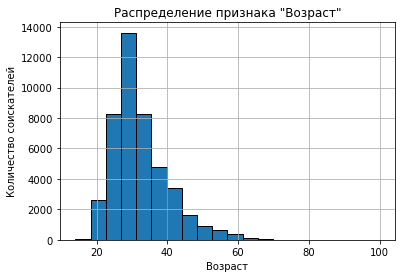

In [2495]:
# Предполагаем, что у вас уже есть датафрейм с возрастом под названием 'hh'
age_distribution = hh['Возраст']

plt.hist(age_distribution, bins=20, edgecolor='black')
plt.xlabel('Возраст')
plt.ylabel('Количество соискателей')
plt.title('Распределение признака "Возраст"')
plt.grid(True)
plt.show()


#### Задание 4.1

Чему равно модальное значение возраста соискателей?

- 30


In [2496]:
mode_age = age_distribution.mode()[0]
print(f"Мода распределения: {mode_age}")


Мода распределения: 30


In [2497]:
min_age = age_distribution.min()
max_age = age_distribution.max()
q1 = age_distribution.quantile(0.25)
q3 = age_distribution.quantile(0.75)

print(f"Минимальный возраст: {min_age}")
print(f"Максимальный возраст: {max_age}")
print(f"Основной интервал (50%): от {q1} до {q3}")

Минимальный возраст: 14
Максимальный возраст: 100
Основной интервал (50%): от 27.0 до 36.0


In [2498]:
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
anomalies = age_distribution[(age_distribution < lower_bound) | (age_distribution > upper_bound)]

print(f"Аномалии: {anomalies.values}")


Аномалии: [60 59 53 ... 53 52 68]


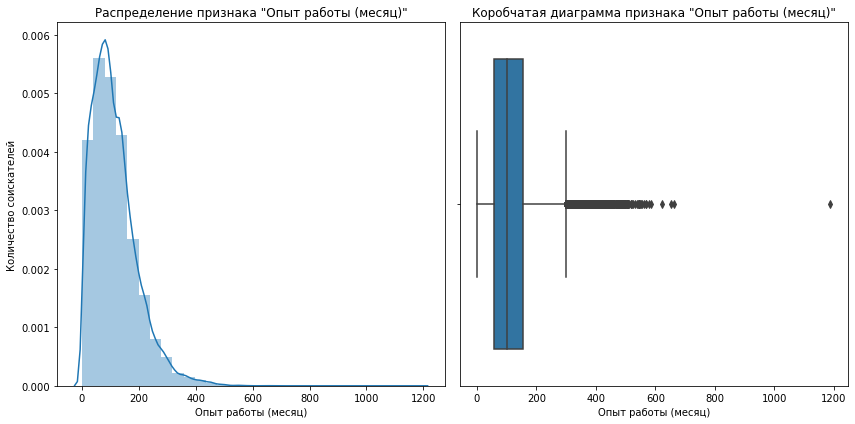

In [2499]:
# Параметры для гистограммы и коробчатой диаграммы
experience_distribution = hh['Опыт работы (мес.)']

plt.figure(figsize=(12, 6))

# Гистограмма
plt.subplot(1, 2, 1)
sns.distplot(experience_distribution, bins=30, kde=True)
plt.xlabel('Опыт работы (месяц)')
plt.ylabel('Количество соискателей')
plt.title('Распределение признака "Опыт работы (месяц)"')

# Коробчатая диаграмма
plt.subplot(1, 2, 2)
sns.boxplot(x=experience_distribution)
plt.xlabel('Опыт работы (месяц)')
plt.title('Коробчатая диаграмма признака "Опыт работы (месяц)"')

plt.tight_layout()
plt.show()


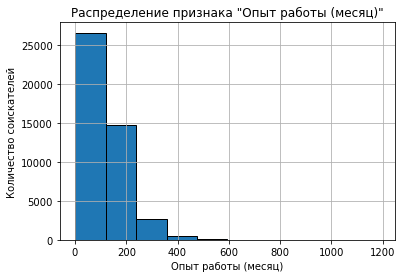

In [2500]:
experience_distribution = hh['Опыт работы (мес.)']

plt.hist(experience_distribution, bins=10, edgecolor='black')
plt.xlabel('Опыт работы (месяц)')
plt.ylabel('Количество соискателей')
plt.title('Распределение признака "Опыт работы (месяц)"')
plt.grid(True)
plt.show()


In [2501]:
mode_experience = experience_distribution.mode()[0]
print(f"Мода распределения: {mode_experience}")


Мода распределения: 81.0


In [2502]:
max_experience_idx = hh['Опыт работы (мес.)'].idxmax()

# Показать строку
max_experience_row = hh.loc[max_experience_idx]

print(max_experience_row)


Пол, возраст                              Мужчина ,  48 лет , родился 27 января 1971
Пол                                                                          Мужчина
Дата рождения                                                    1971-01-27 00:00:00
Возраст                                                                           48
ЗП                                                                         60000 RUB
ЗП_в_RUB                                                                       60000
Ищет работу на должность:                            Системный администратор Windows
Город, переезд, командировки       Ростов-на-Дону , готов к переезду , готов к ко...
Город                                                                 Ростов-на-Дону
Занятость                                      частичная занятость, полная занятость
График                             гибкий график, полный день, вахтовый метод, уд...
Опыт работы                        Опыт работы 99 лет  Июнь 1920 

In [2503]:
min_experience = experience_distribution.min()
max_experience = experience_distribution.max()
q1 = experience_distribution.quantile(0.25)
q3 = experience_distribution.quantile(0.75)

print(f"Минимальный опыт работы: {min_experience}")
print(f"Максимальный опыт работы: {max_experience}")
print(f"Основной интервал (50%): от {q1} до {q3}")


Минимальный опыт работы: 1.0
Максимальный опыт работы: 1188.0
Основной интервал (50%): от 57.0 до 154.0


In [2504]:
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
anomalies = experience_distribution[(experience_distribution < lower_bound) | (experience_distribution > upper_bound)]

print(f"Аномалии: {anomalies.values}")


Аномалии: [510. 325. 303. ... 382. 379. 306.]


Постройте распределение признака «ЗП (руб)». Опишите распределение, отвечая на следующие вопросы:

Чему равна мода распределения?
Каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей?
Есть ли аномалии для признака заработной платы? Если есть, то какие значения вы бы причислили к таковым?

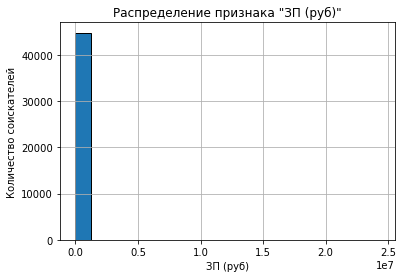

In [2505]:

salary_distribution = hh['ЗП_в_RUB']

plt.hist(salary_distribution, bins=20, edgecolor='black')
plt.xlabel('ЗП (руб)')
plt.ylabel('Количество соискателей')
plt.title('Распределение признака "ЗП (руб)"')
plt.grid(True)
plt.show()


In [2506]:
mode_salary = salary_distribution.mode()[0]
print(f"Мода распределения: {mode_salary}")


Мода распределения: 50000.0


In [2507]:
min_salary = salary_distribution.min()
max_salary = salary_distribution.max()
q1 = salary_distribution.quantile(0.25)
q3 = salary_distribution.quantile(0.75)

print(f"Минимальная зарплата: {min_salary}")
print(f"Максимальная зарплата: {max_salary}")
print(f"Основной интервал (50%): от {q1} до {q3}")


Минимальная зарплата: 1.0
Максимальная зарплата: 24304876.0
Основной интервал (50%): от 37082.2 до 95000.0


In [2508]:
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
anomalies = salary_distribution[(salary_distribution < lower_bound) | (salary_distribution > upper_bound)]

print(f"Аномалии: {anomalies.values}")


Аномалии: [250000. 260000. 250000. ... 200000. 200000. 220000.]


In [2509]:
high_salary_applicants = hh[hh['ЗП_в_RUB'] > 1000000]
count_high_salary = len(high_salary_applicants)

print(f"Количество соискателей, требующих заработную плату выше 1 миллиона рублей: {count_high_salary}")


Количество соискателей, требующих заработную плату выше 1 миллиона рублей: 5


#### Задание 4.3

Определите по графику, сколько соискателей требуют заработную плату выше 1 миллиона рублей.
- 5
 

Постройте диаграмму, которая показывает зависимость медианной желаемой заработной платы («ЗП (руб)») от уровня образования («Образование»).

Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 миллиона рублей.

Сделайте выводы по представленной диаграмме:

Для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы?
Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?

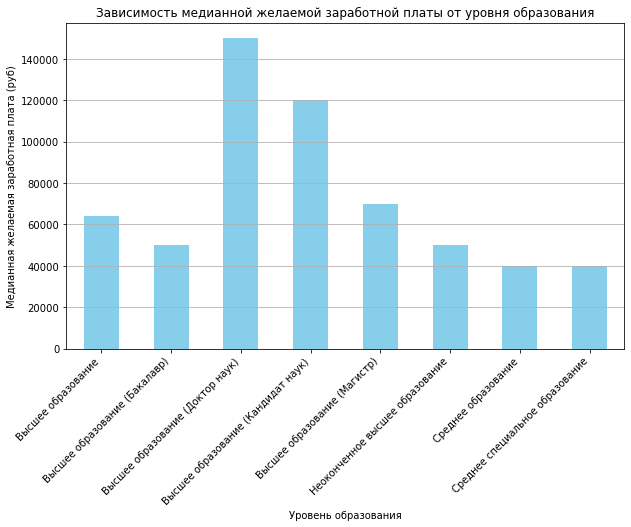

In [2510]:
# Фильтруем данные, оставляя только те, где ЗП меньше 1 миллиона рублей
filtered_data = hh[hh['ЗП_в_RUB'] < 1000000]

# Рассчитываем медианную зарплату для каждого уровня образования
median_salary_by_education = filtered_data.groupby('Образование')['ЗП_в_RUB'].median()

# Строим диаграмму
plt.figure(figsize=(10, 6))
median_salary_by_education.plot(kind='bar', color='skyblue')
plt.xlabel('Уровень образования')
plt.ylabel('Медианная желаемая заработная плата (руб)')
plt.title('Зависимость медианной желаемой заработной платы от уровня образования')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.show()


In [2511]:
# Разделим данные по категориям образования
education_groups = hh.groupby('Образование')['ЗП_в_RUB'].median()

# Найдем категорию с самой высокой медианной зарплатой
highest_median_salary = education_groups.idxmax()
highest_median_value = education_groups.max()

print(f"Категория образования с самой высокой медианной зарплатой: {highest_median_salary}")
print(f"Медианная зарплата для этой категории: {highest_median_value}")


Категория образования с самой высокой медианной зарплатой: Высшее образование (Доктор наук)
Медианная зарплата для этой категории: 150000.0


#### Задание 4.4

Какая категория образования оплачивается выше всех по медианному показателю?

 - Высшее образование 


Постройте диаграмму, которая показывает распределение желаемой заработной платы («ЗП (руб)») в зависимости от города («Город»). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 миллиона рублей.

Сделайте выводы по полученной диаграмме:

Как соотносятся медианные уровни желаемой заработной платы и их размах в городах?
Как вы считаете, важен ли признак города при прогнозировании заработной платы?

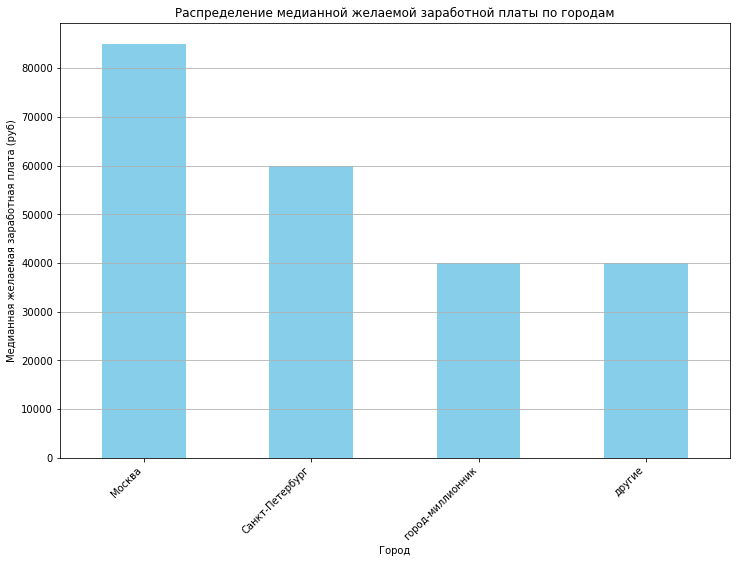

In [2512]:
# Фильтрация данных
filtered_data = hh[hh['ЗП_в_RUB'] < 1000000]

# Группировка данных по городам и вычисление медианной ЗП
median_salary_by_city = filtered_data.groupby('Город1')['ЗП_в_RUB'].median()

# Строим диаграмму
plt.figure(figsize=(12, 8))
median_salary_by_city.plot(kind='bar', color='skyblue')
plt.xlabel('Город')
plt.ylabel('Медианная желаемая заработная плата (руб)')
plt.title('Распределение медианной желаемой заработной платы по городам')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.show()


In [2513]:
highest_salary = hh[hh['ЗП_в_RUB'] >= 924000]

max_salary_city = highest_salary.loc[highest_salary['ЗП_в_RUB'].idxmax(), 'Город1']
max_salary = highest_salary['ЗП_в_RUB'].max()

print(f"Город с наибольшим показателем желаемой заработной платы: {max_salary_city}")
print(f"Максимальная желаемая заработная плата: {max_salary} рублей")


Город с наибольшим показателем желаемой заработной платы: другие
Максимальная желаемая заработная плата: 24304876.0 рублей


#### Задание 4.5

В каком городе (категории городов) зафиксирован наибольший показатель желаемой заработной платы (~924 тысячи рублей)? 
- Другие

Постройте многоуровневую столбчатую диаграмму, которая показывает зависимость медианной заработной платы («ЗП (руб)») от признаков «Готовность к переезду» и «Готовность к командировкам». Проанализируйте график, сравнив уровень заработной платы по категориям.

<Figure size 720x432 with 0 Axes>

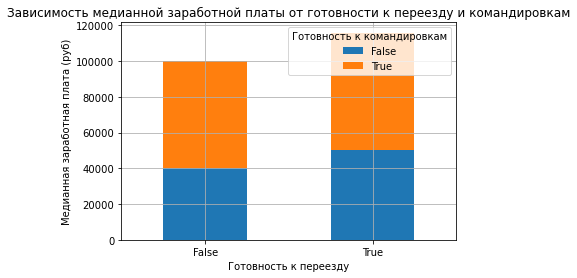

In [2514]:
# Создаем сводную таблицу для группировки данных
pivot_table = hh.pivot_table(
    values='ЗП_в_RUB',
    index='Готовность к переезду',
    columns='Готовность к командировкам',
    aggfunc='median'
)

# Построение диаграммы
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar', stacked=True)
plt.xlabel('Готовность к переезду')
plt.ylabel('Медианная заработная плата (руб)')
plt.title('Зависимость медианной заработной платы от готовности к переезду и командировкам')
plt.legend(title='Готовность к командировкам')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


In [2515]:
# Выборка данных для соискателей, готовых и к переезду, и к командировкам
ready_for_all = hh[(hh['Готовность к переезду'] == True) & (hh['Готовность к командировкам'] == True)]

# Рассчет медианной заработной платы
median_salary = ready_for_all['ЗП_в_RUB'].median()

# Приведение к тысячам и округление
median_salary_thousands = round(median_salary / 1000)
print(f"Медианная заработная плата соискателей, готовых и к переезду, и к командировкам: {median_salary_thousands} тыс. руб.")


Медианная заработная плата соискателей, готовых и к переезду, и к командировкам: 66 тыс. руб.


#### Задание 4.6

Чему равна желаемая медианная заработная плата соискателей, готовых и к переезду, и к командировкам? Ответ приведите в тысячах, округлив до целого (например, 45).

 - 66
 

Постройте сводную таблицу, иллюстрирующую зависимость медианной желаемой заработной платы от возраста («Возраст») и образования («Образование»).

По полученной сводной таблице постройте тепловую карту.

Проанализируйте тепловую карту, сравнив показатели внутри групп.

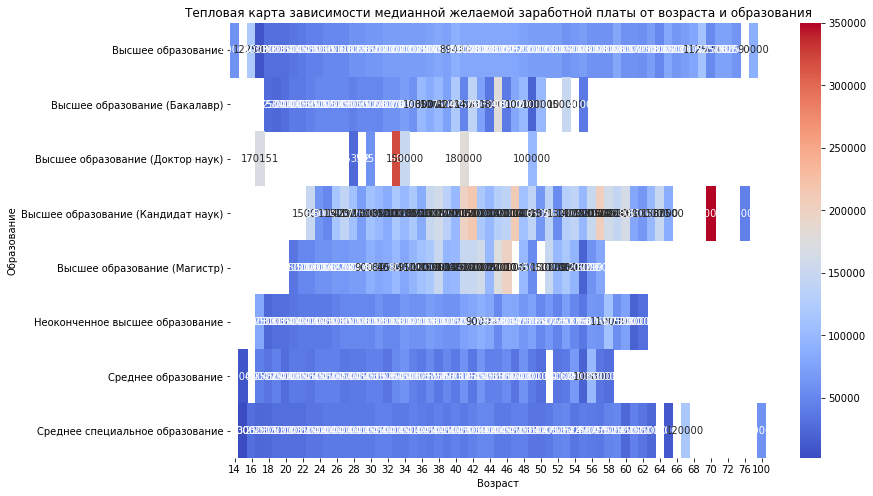

In [2516]:

# Предположим, что у вас уже есть датафрейм hh

# Создание сводной таблицы
pivot_table = hh.pivot_table(
    values='ЗП_в_RUB',
    index='Образование',
    columns='Возраст',
    aggfunc='median'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='coolwarm')
plt.xlabel('Возраст')
plt.ylabel('Образование')
plt.title('Тепловая карта зависимости медианной желаемой заработной платы от возраста и образования')
plt.show()



#### Задание 4.7

Для какой категории образования наблюдается самый быстрый карьерный рост (то есть интенсивность роста заработной платы наибольшая)?

- высшее

Постройте диаграмму рассеяния, показывающую зависимость опыта работы («Опыт работы (месяц)») от возраста («Возраст»). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе.

Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше неё, — аномалии в наших данных (опыт работы больше либо равен возрасту соискателя).

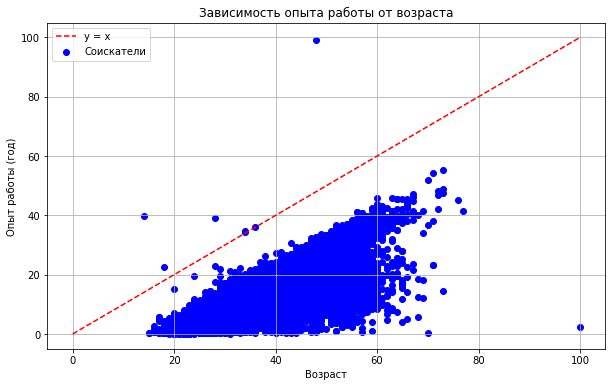

In [2517]:


# Перевод опыта работы из месяцев в года
hh['Опыт работы (год)'] = hh['Опыт работы (мес.)'] / 12

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(hh['Возраст'], hh['Опыт работы (год)'], color='blue', label='Соискатели')

# Добавление прямой y=x
plt.plot([0, 100], [0, 100], color='red', linestyle='--', label='y = x')

plt.xlabel('Возраст')
plt.ylabel('Опыт работы (год)')
plt.title('Зависимость опыта работы от возраста')
plt.legend()
plt.grid(True)
plt.show()


In [2518]:
# Определение точек выше прямой y=x
anomalies = hh[hh['Опыт работы (год)'] > hh['Возраст']]

count_anomalies = len(anomalies)
print(f"Количество точек, лежащих строго выше построенной прямой: {count_anomalies}")

Количество точек, лежащих строго выше построенной прямой: 7


#### Задание 4.8

Сколько точек лежат строго выше построенной прямой? Так как точки могут сливаться с прямой, то для ответа на этот вопрос проще всего воспользоваться интерактивной визуализацией либо получить таблицу с наблюдениями, лежащими выше прямой с помощью фильтрации.
- 7

Мы провели разведывательный анализ. Догадываетесь, каким будет следующий этап? Всё верно: переходим к очистке!

### Очистка данных

Когда мы проводили визуальный анализ, мы нашли несколько несостыковок в данных: пропуски, гигантские размеры желаемых заработных плат, резюме людей слишком «преклонного» возраста, опыт работы, превышающий возраст.

Всё это говорит о том, что данные подлежат очистке. Приступим!

In [2519]:
hh.duplicated().sum()

153

In [2520]:
dupl_columns = list(hh.columns)

mask = hh.duplicated(subset=dupl_columns)
hh_duplicates = hh[mask]
print(f'Число найденных дубликатов: {hh_duplicates.shape[0]}')

Число найденных дубликатов: 153


In [2521]:
# Найдем полные дубликаты
hh[hh.duplicated()]

,"Пол, возраст",Пол,Дата рождения,Возраст,ЗП,ЗП_в_RUB,Ищет работу на должность:,"Город, переезд, командировки",Город,Занятость,...,стажировка,волонтерство,частичная занятость,проектная работа,полная занятость,полный день,гибкий график,сменный график,вахтовый метод,удаленная работа
380,"Мужчина , 38 лет , родился 15 ноября 1980",Мужчина,1980-11-15,38,55000 RUB,55000.000,"системный администратор, информационная безопа...","Красноярск , не готов к переезду , готов к ком...",Красноярск,"частичная занятость, полная занятость",...,False,False,True,False,True,True,True,False,False,True
543,"Мужчина , 26 лет , родился 22 августа 1992",Мужчина,1992-08-22,26,37000 RUB,37000.000,Аналитик,"Санкт-Петербург , не готов к переезду , готов ...",Санкт-Петербург,полная занятость,...,False,False,False,False,True,True,False,False,False,False
876,"Мужчина , 36 лет , родился 13 февраля 1983",Мужчина,1983-02-13,36,35000 RUB,35000.000,Системный администратор,"Челябинск , не готов к переезду , готов к редк...",Челябинск,полная занятость,...,False,False,False,False,True,True,False,False,False,False
1038,"Мужчина , 29 лет , родился 12 октября 1989",Мужчина,1989-10-12,29,180000 RUB,180000.000,Главный инженер проекта,"Москва , м. Бабушкинская , готов к переезду ,...",Москва,"частичная занятость, проектная работа, полная ...",...,False,False,True,True,True,True,True,True,True,True
1116,"Мужчина , 37 лет , родился 2 июля 1981",Мужчина,1981-07-02,37,90000 RUB,90000.000,Руководитель отдела программирования станков с...,"Уфа , готов к переезду , готов к командировкам",Уфа,"проектная работа, полная занятость",...,False,False,False,True,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6506,"Мужчина , 38 лет , родился 3 марта 1981",Мужчина,1981-03-03,38,30000 RUB,30000.000,Сервисный инженер,"Калининград , готов к переезду , готов к редки...",Калининград,"частичная занятость, полная занятость",...,False,False,True,False,True,True,True,True,True,True
6511,"Мужчина , 31 год , родился 25 мая 1987",Мужчина,1987-05-25,31,51500 RUB,51500.000,"Системный администратор, Сервисный инженер, по...","Москва , м. Щелковская , готов к переезду , г...",Москва,полная занятость,...,False,False,False,False,True,True,True,True,False,False
6535,"Мужчина , 39 лет , родился 31 января 1980",Мужчина,1980-01-31,39,1290 USD,83561.814,"Интернет-маркетолог, руководитель (Продажи чер...","Нижний Новгород , готов к переезду , готов к к...",Нижний Новгород,"частичная занятость, проектная работа, полная ...",...,False,False,True,True,True,True,True,True,False,False
6541,"Мужчина , 37 лет , родился 15 мая 1981",Мужчина,1981-05-15,37,40000 RUB,40000.000,Монтажник слаботочных систем,"Зеленоград , не готов к переезду , готов к ред...",Зеленоград,"частичная занятость, проектная работа, полная ...",...,False,False,True,True,True,True,True,True,False,False


In [2522]:
# Количество полных дубликатов
count_duplicates = len(duplicates)

# # Удаление полных дубликатов
# hh = hh.drop_duplicates()

print(f"Количество полных копий: {count_duplicates}") 

Количество полных копий: 153


#### Задание 5.1

Начнём с дубликатов в наших данных. Найдите полные дубликаты в таблице с резюме и удалите их.

Сколько полных копий удалось найти?
 - 153

In [2523]:
# Вывод информации о пропусках
missing_values = hh.isna().sum()

# Число пропусков в столбце "Опыт работы (месяц)"
missing_experience = missing_values['Опыт работы (мес.)']

print(missing_values)
print(f"Пропусков в столбце «Опыт работы (месяц)»: {missing_experience}")

Пол, возраст                         0
Пол                                  0
Дата рождения                        0
Возраст                              0
ЗП                                   0
ЗП_в_RUB                             0
Ищет работу на должность:            0
Город, переезд, командировки         0
Город                                0
Занятость                            0
График                               0
Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Образование                          0
Обновление резюме                    0
Авто                                 0
Год образования                      0
Опыт работы (мес.)                 170
Опыт работы (год)                  170
Готовность к переезду                0
Готовность к командировкам           0
Город1                               0
стажировка                           0
волонтерство             

#### Задание 5.2

Займёмся пропусками. Выведите информацию о числе пропусков в столбцах.

Сколько пропусков в столбце «Опыт работы (месяц)»?
- 168

Итак, у нас есть пропуски в трёх столбцах: «Опыт работы (месяц)», «Последнее/нынешнее место работы», «Последняя/нынешняя должность». Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью.

In [2525]:
# Удаление строк с пропусками в столбцах «Последнее/нынешнее место работы» и «Последняя/нынешняя должность»
hh = hh.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

# Заполнение пропусков в столбце «Опыт работы (месяц)» медианным значением
median_experience = hh['Опыт работы (мес.)'].median()
hh['Опыт работы (мес.)'] = hh['Опыт работы (мес.)'].fillna(median_experience)

# Рассчет среднего значения в столбце «Опыт работы (мес.)» после заполнения пропусков
average_experience = hh['Опыт работы (мес.)'].mean()
average_experience_rounded = (average_experience)

print(f"Результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков: {average_experience_rounded}")
 

Результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков: 114.36887041258773


C:\Users\smikl\anaconda3\envs\practicum\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Задание 5.3

Чему равно результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков? Ответ округлите до целых.

 - 114

Мы добрались до ликвидации выбросов. Сначала очистим данные вручную.

Удалите резюме, в которых указана заработная плата либо выше 1 миллиона рублей, либо ниже 1 тысячи рублей.

In [2526]:
# Количество выбросов
outliers = hh[(hh['ЗП_в_RUB'] > 1000000) | (hh['ЗП_в_RUB'] < 1000)]

# Удаление выбросов
hh_cleaned = hh.drop(outliers.index)

# Подсчет количества выбросов
count_outliers = len(outliers)

print(f"Количество выбросов: {count_outliers}")


Количество выбросов: 89


#### Задание 5.4

Сколько выбросов вы нашли?

 - 89

В процессе разведывательного анализа мы обнаружили резюме, в которых опыт работы в годах превышал возраст соискателя. Найдите такие резюме и удалите их из данных.

In [2527]:
# Перевод опыта работы из месяцев в годы
hh['Опыт работы (год)'] = hh['Опыт работы (мес.)'] / 12

# Поиск выбросов (резюме, где опыт работы превышает возраст)
outliers = hh[hh['Опыт работы (год)'] > hh['Возраст']]

# Количество выбросов
count_outliers = len(outliers)
outliers[['Возраст', 'Опыт работы (год)', 'Опыт работы', 'Пол, возраст']]

C:\Users\smikl\anaconda3\envs\practicum\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Возраст,Опыт работы (год),Опыт работы,"Пол, возраст"
4535,18,22.583333,Опыт работы 22 года 7 месяцев Январь 1996 — И...,"Женщина , 18 лет , родилась 5 июля 2000"
19351,28,39.166667,Опыт работы 39 лет 2 месяца Специалист (Junio...,"Мужчина , 28 лет , родился 4 сентября 1990"
19872,34,34.666667,Опыт работы 34 года 8 месяцев Аналитик 25 000...,"Мужчина , 34 года , родился 12 ноября 1984"
26477,34,34.250000,Опыт работы 34 года 3 месяца Октябрь 2017 — п...,"Мужчина , 34 года , родился 24 марта 1985"
29098,14,39.750000,Опыт работы 39 лет 9 месяцев Ведущий инженер-...,"Мужчина , 14 лет , родился 1 января 2005"
40015,48,99.000000,Опыт работы 99 лет Июнь 1920 — по настоящее в...,"Мужчина , 48 лет , родился 27 января 1971"
43451,36,36.166667,Опыт работы 36 лет 2 месяца Руководитель отде...,"Мужчина , 36 лет , родился 31 марта 1983"


In [2528]:
# Удаление выбросов
hh_cleaned = hh.drop(outliers.index)

print(f"Количество выбросов: {count_outliers}")


Количество выбросов: 7


#### Задание 5.5

Сколько выбросов вы нашли?

- 7

В результате анализа мы обнаружили потенциальные выбросы в признаке Возраст. Это оказались резюме людей, чей возраст слишком преклонный для поиска работы.

Попробуйте построить распределение признака в логарифмическом масштабе. Добавьте к графику линии, отображающие среднее и границы интервала метода трёх сигм. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

histplot.axvline(log_age.mean(), color='k', lw=2)
В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику. Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем "послабление" на 1 сигму (возьмите 4 сигмы) в правую сторону. Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

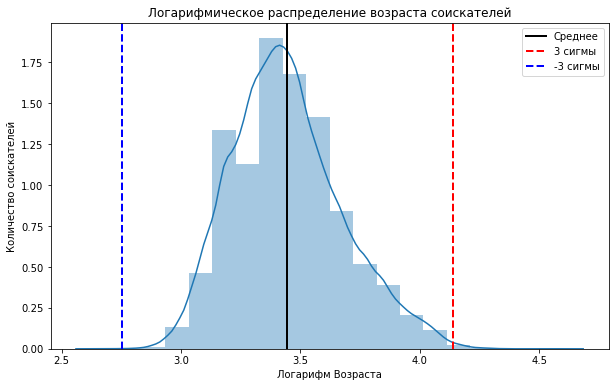

Распределение асимметрично в правую сторону, так как есть возрастные соискатели.


In [2529]:
# Создание логарифмического распределения
log_age = np.log(hh['Возраст'])

plt.figure(figsize=(10, 6))
histplot = sns.distplot(log_age, bins=20, kde=True)
histplot.axvline(log_age.mean(), color='k', lw=2, label='Среднее')
histplot.axvline(log_age.mean() + 3 * log_age.std(), color='r', linestyle='--', lw=2, label='3 сигмы')
histplot.axvline(log_age.mean() - 3 * log_age.std(), color='b', linestyle='--', lw=2, label='-3 сигмы')
plt.xlabel('Логарифм Возраста')
plt.ylabel('Количество соискателей')
plt.title('Логарифмическое распределение возраста соискателей')
plt.legend()

plt.show()

print("Распределение асимметрично в правую сторону, так как есть возрастные соискатели.")



In [2530]:
# Расчет z-отклонений
z_scores = (log_age - log_age.mean()) / log_age.std()

# Определение выбросов (4 сигмы в правую сторону)
outliers = hh[(z_scores > 4) | (z_scores < -3)]
count_outliers = len(outliers)

# Удаление выбросов
hh_cleaned = hh.drop(outliers.index)

print(f"Количество выбросов, найденных с помощью метода z-отклонений: {count_outliers}")
print("Возраст соискателей, попавших под категорию выбросов:")
print(outliers['Возраст'])


Количество выбросов, найденных с помощью метода z-отклонений: 4
Возраст соискателей, попавших под категорию выбросов:
29098     14
31137     15
32950     15
33654    100
Name: Возраст, dtype: int32


#### Задание 5.6

Сколько выбросов вы нашли с помощью метода z-отклонений?

- 4

Вероятно нужен более глубокий анализ или больше выводов. Напишите обратную связь - так как могу закапаться и потратить много драгоценного времени.